In [ ]:
'''
비계층적 군집분석
'''

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

replace_cm = lambda x : x.replace('(cm)', '')
replace_blank = lambda x : x.replace(' ', '_')
relplace_columns = lambda x : replace_blank(replace_cm(x))
iris_df.columns = [relplace_columns(col) for col in iris_df.columns]


X = iris_df.drop(columns='target')
y = iris_df['target']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [2]:
# KMEANS
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

max_cluster = 10

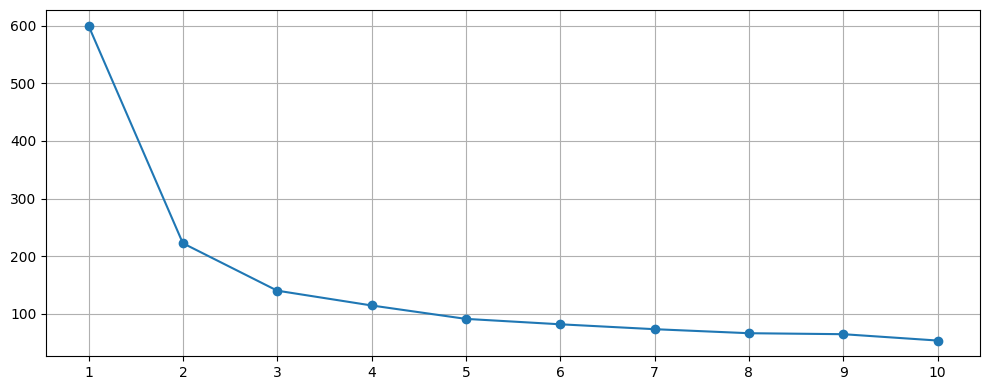

In [3]:
def elbow_method(X, max_cluster) -> int:
    intertia_list = []
    for n_clusters in range(1, max_cluster + 1):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        inertia = kmeans.inertia_
        intertia_list.append(inertia)
    return intertia_list

plt.figure(figsize=(10, 4))
intertia_list = elbow_method(X_scaled, max_cluster)
plt.plot(range(1, max_cluster + 1), intertia_list, marker='o')
plt.xticks(range(1, max_cluster + 1))
plt.grid()
plt.tight_layout()
plt.show()